In [62]:
# for rendering Latex

import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.style.use('seaborn-dark-palette')

width = 345

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

In [63]:
import numpy as np
import os
import random

random.seed(123)
np.random.seed(123)

import sys
sys.path.append('../')

from src.utils import load_data

DATA_DIR = '../data'
BETA_VALUES = np.sort(
    [float(x.split('fermi_')[-1]) for x in os.listdir(DATA_DIR) if x.startswith('fermi')])

print('Beta values:',len(BETA_VALUES))

Beta values: 30


In [71]:
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import dcor

scaler = StandardScaler()

col_idx = 0

data = load_data(DATA_DIR, 0.1)
X_0 = scaler.fit_transform(data.data_matrix)
len_x0  = 500000

X_0 = X_0[:len_x0, :]

distances = list()
for beta in tqdm(BETA_VALUES[1:]):
    
    data = load_data(DATA_DIR, beta)
    X = scaler.fit_transform(data.data_matrix)[:len_x0, :]

    dist_corr = []
    for i in range(X.shape[1]):
        dist_corr.append(dcor.distance_correlation(X_0[:, i], X[:, i]))

    distances.append(np.mean(dist_corr))
    
distances = np.array(distances)

100%|██████████| 29/29 [22:45<00:00, 47.08s/it]


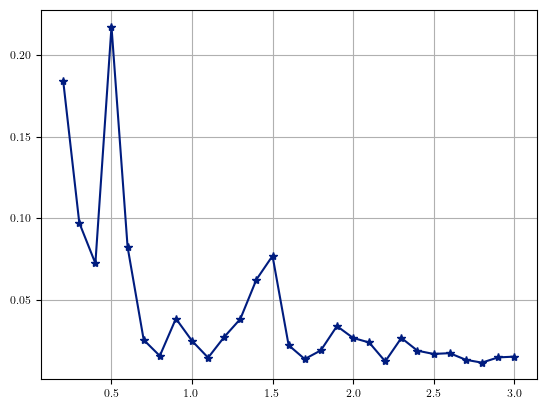

In [74]:
plt.plot(BETA_VALUES[1:], distances, '*-')
plt.grid()